# DataSet Description

#### This dataset was released as part of a Kaggle competition focused on predicting podcast engagement. Each row represents a single podcast episode, enriched with metadata such as genre, episode length, host and guest popularity, release time, and sentiment.

#### The goal of the competition is to build a machine learning model that can accurately predict the average listening time (minutes) for each episode, based on these input features.

https://www.kaggle.com/competitions/playground-series-s5e4/overview


### Columns

1- id → Unique identifier of the record.

2- Podcast_Name → Name of the podcast series.

3- Episode_Title → Title or number of the episode.

4- Episode_Length_minutes → Duration of the episode.

5- Genre → Category (e.g., Comedy, Education, True Crime).

6- Host_Popularity_percentage → Popularity of the host (0–100%).

7- Publication_Day → Day of the week of release.

8- Publication_Time → Time slot of release (Morning/Afternoon/Evening/Night).

9- Guest_Popularity_percentage → Popularity of the guest (if any).

10- Number_of_Ads → Number of ads inserted in the episode.

11- Episode_Sentiment → Tone of the episode (Positive, Negative, Neutral).

12- Listening_Time_minutes (Target Variable) → Average time listeners spent on the episode.

# import libraries

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,make_scorer
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from tqdm import tqdm
import pickle


# Read data

In [137]:
# import data

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [138]:
# show shape of data

print(f'shape of train data : {train.shape}')
print(f'shape of test data : {test.shape}')

shape of train data : (750000, 12)
shape of test data : (250000, 11)


In [139]:
# show head of train data

train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [140]:
# show columns in train data

train.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

In [141]:
# Show columns in test data

test.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment'],
      dtype='object')

In [142]:
# show info of train and test data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [143]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Podcast_Name                 250000 non-null  object 
 2   Episode_Title                250000 non-null  object 
 3   Episode_Length_minutes       221264 non-null  float64
 4   Genre                        250000 non-null  object 
 5   Host_Popularity_percentage   250000 non-null  float64
 6   Publication_Day              250000 non-null  object 
 7   Publication_Time             250000 non-null  object 
 8   Guest_Popularity_percentage  201168 non-null  float64
 9   Number_of_Ads                250000 non-null  float64
 10  Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 21.0+ MB


In [144]:
# Show description of train and test data

train.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [145]:
test.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads
count,250000.000000,2.212640e+05,250000.000000,201168.000000,250000.000000
mean,874999.500000,4.192987e+02,59.716491,52.192796,1.355852
std,72168.927986,1.668545e+05,22.880028,28.445034,4.274399
min,750000.000000,2.470000e+00,2.490000,0.000000,0.000000
25%,812499.750000,3.578000e+01,39.250000,28.320000,0.000000
50%,874999.500000,6.397000e+01,59.900000,53.360000,1.000000
75%,937499.250000,9.415000e+01,79.390000,76.560000,2.000000
max,999999.000000,7.848626e+07,117.760000,116.820000,2063.000000


In [146]:
# Drop id & Episode_Title column in train

train.drop(['id','Episode_Title','Podcast_Name'],axis=1,inplace=True)

In [147]:
# Drop id & Episode_Title column in Test

test.drop(['id','Episode_Title','Podcast_Name'],axis=1,inplace=True)

# Check Nan values for train and test data

## For Train

In [148]:
# Calc the number of nan values in train 

train.isna().sum().sort_values(ascending=False)

Guest_Popularity_percentage    146030
Episode_Length_minutes          87093
Number_of_Ads                       1
Genre                               0
Host_Popularity_percentage          0
Publication_Time                    0
Publication_Day                     0
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [149]:
# calc the percentage of nan values
(train.isna().sum().sort_values(ascending=False)/len(train))*100

Guest_Popularity_percentage    19.470667
Episode_Length_minutes         11.612400
Number_of_Ads                   0.000133
Genre                           0.000000
Host_Popularity_percentage      0.000000
Publication_Time                0.000000
Publication_Day                 0.000000
Episode_Sentiment               0.000000
Listening_Time_minutes          0.000000
dtype: float64

In [150]:
# Remove from Nan values (Number_of_Ads) column 

train.dropna(subset=['Number_of_Ads'],axis=0,inplace=True)

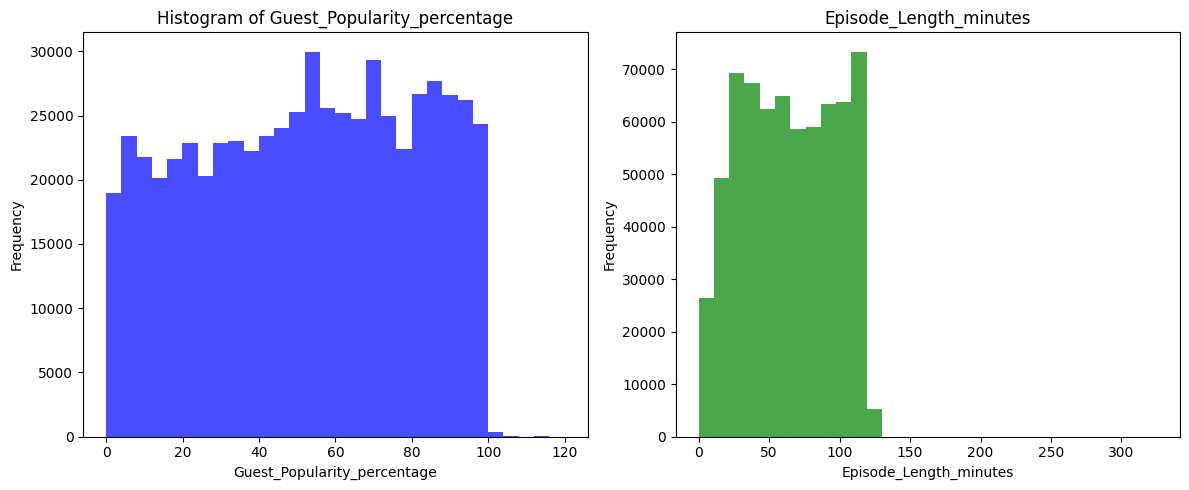

In [151]:
# draw histogram for (Guest_Popularity_percentage, Episode_Length_minutes) Columns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(train['Guest_Popularity_percentage'], bins=30, color='blue', alpha=0.7)
axes[0].set_title(f"Histogram of Guest_Popularity_percentage")
axes[0].set_xlabel('Guest_Popularity_percentage')
axes[0].set_ylabel("Frequency")

axes[1].hist(train['Episode_Length_minutes'], bins=30, color='green', alpha=0.7)
axes[1].set_title("Episode_Length_minutes")
axes[1].set_xlabel("Episode_Length_minutes")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [152]:
# replace nan values in ( Guest_Popularity_percentage,Episode_Length_minutes ) columns with median

train_cols=['Guest_Popularity_percentage','Episode_Length_minutes']

for col in train_cols:
    train[col].fillna(train[col].median(),inplace = True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_14088\3375719075.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(),inplace = True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14088\3375719075.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [153]:
# Check nan values after remove it

train.isna().sum().sort_values(ascending=False)

Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

## For Test

In [154]:
# calc sum of nan values in test

test.isna().sum().sort_values(ascending=False)

Guest_Popularity_percentage    48832
Episode_Length_minutes         28736
Host_Popularity_percentage         0
Genre                              0
Publication_Day                    0
Publication_Time                   0
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [155]:
# calc the percentage of nan values in test

(test.isna().sum().sort_values(ascending=False)/len(test))*100

Guest_Popularity_percentage    19.5328
Episode_Length_minutes         11.4944
Host_Popularity_percentage      0.0000
Genre                           0.0000
Publication_Day                 0.0000
Publication_Time                0.0000
Number_of_Ads                   0.0000
Episode_Sentiment               0.0000
dtype: float64

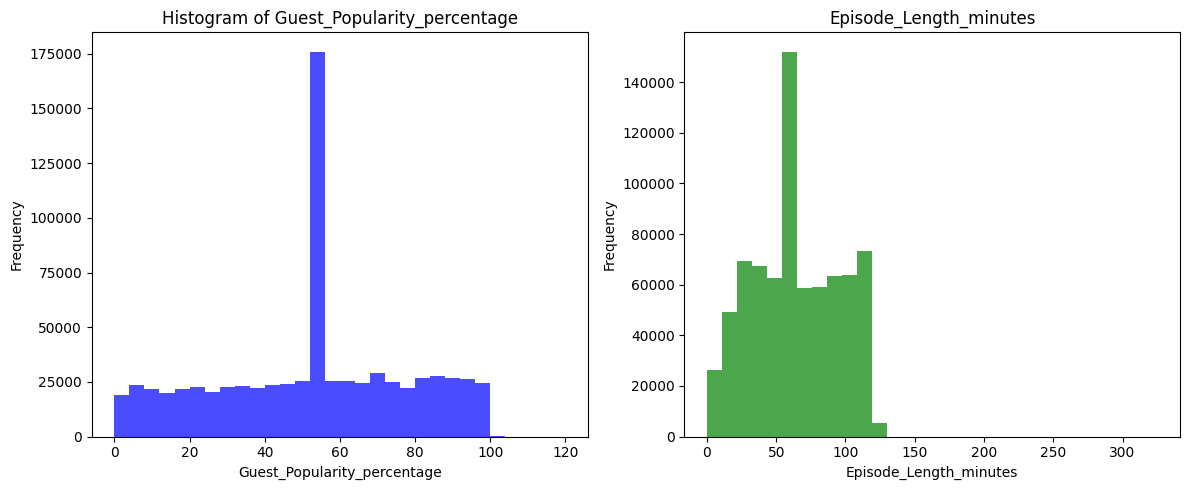

In [156]:
# draw histogram for (Guest_Popularity_percentage, Episode_Length_minutes) Columns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(train['Guest_Popularity_percentage'], bins=30, color='blue', alpha=0.7)
axes[0].set_title(f"Histogram of Guest_Popularity_percentage")
axes[0].set_xlabel('Guest_Popularity_percentage')
axes[0].set_ylabel("Frequency")

axes[1].hist(train['Episode_Length_minutes'], bins=30, color='green', alpha=0.7)
axes[1].set_title("Episode_Length_minutes")
axes[1].set_xlabel("Episode_Length_minutes")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [157]:
# replace nan values in Guest_Popularity_percentage, Episode_Length_minutes columns with median

test_cols=['Guest_Popularity_percentage','Episode_Length_minutes']

for col in test_cols:
    test[col].fillna(test[col].median(),inplace = True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_14088\1617669301.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(test[col].median(),inplace = True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14088\1617669301.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [158]:
# check nan values after remove it

test.isna().sum().sort_values(ascending=False)

Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
dtype: int64

# Check duplication 

In [159]:
# for train

train.duplicated().sum()

# no duplicated values to remove

np.int64(2239)

In [160]:
# for test

test.duplicated().sum()

# no duplicated values to remove

np.int64(274)

In [161]:
# reset index

train.reset_index(drop=True, inplace=True)

test.reset_index(drop=True, inplace=True)

In [162]:
train.shape

(749999, 9)

In [163]:
test.shape

(250000, 8)

# Data Visualization

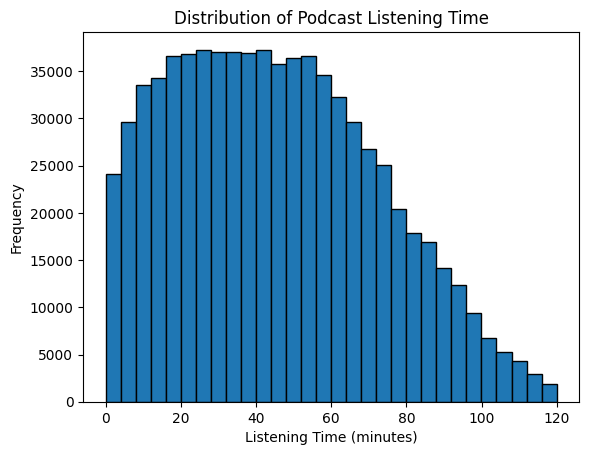

In [164]:
# the distribution of podcast listening time

plt.hist(train['Listening_Time_minutes'], bins=30, edgecolor='black')
plt.xlabel("Listening Time (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Podcast Listening Time")
plt.show()

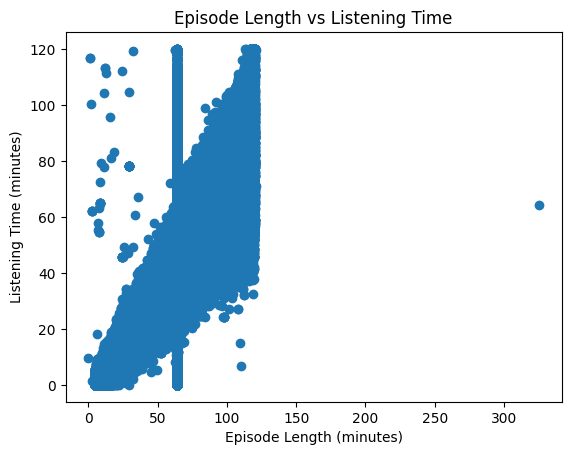

In [165]:
# relationship between episode length and listening time

plt.scatter(train['Episode_Length_minutes'], train['Listening_Time_minutes'])
plt.xlabel("Episode Length (minutes)")
plt.ylabel("Listening Time (minutes)")
plt.title("Episode Length vs Listening Time")
plt.show()

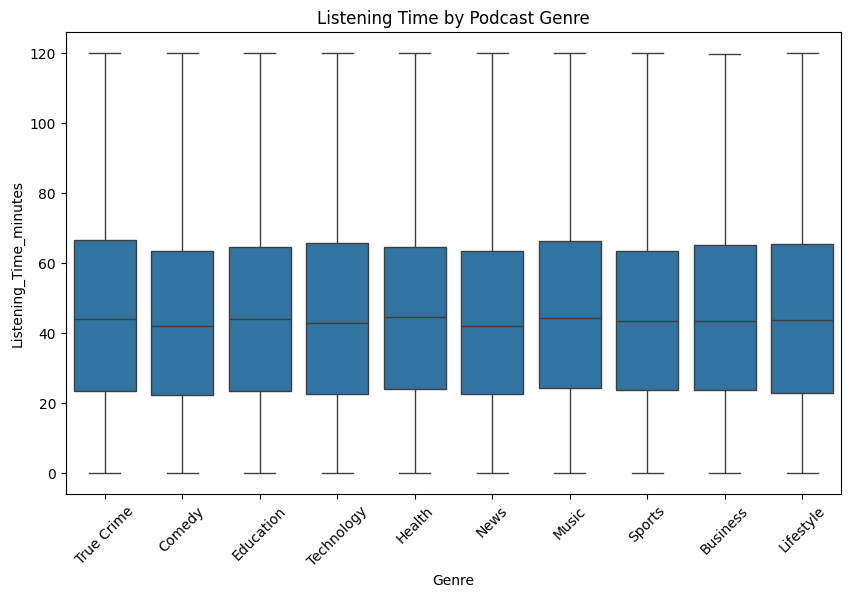

In [166]:
# podcast genres get the longest listening times

plt.figure(figsize=(10,6))
sns.boxplot(x='Genre', y='Listening_Time_minutes', data=train)
plt.xticks(rotation=45)
plt.title("Listening Time by Podcast Genre")
plt.show()

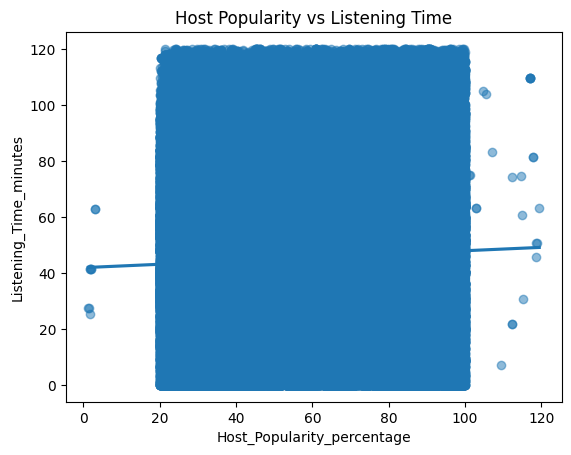

In [167]:
# Does host popularity impact listening time?

sns.regplot(x='Host_Popularity_percentage', y='Listening_Time_minutes', data=train, scatter_kws={'alpha':0.5})
plt.title("Host Popularity vs Listening Time")
plt.show()

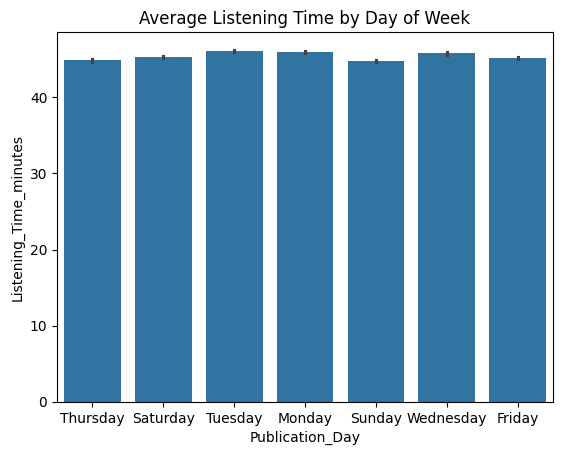

In [168]:
# Which days of the week have the highest average listening time?

sns.barplot(x='Publication_Day', y='Listening_Time_minutes', data=train, estimator='mean')
plt.title("Average Listening Time by Day of Week")
plt.show()

# Check outliers

### For Train

In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749999 entries, 0 to 749998
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Episode_Length_minutes       749999 non-null  float64
 1   Genre                        749999 non-null  object 
 2   Host_Popularity_percentage   749999 non-null  float64
 3   Publication_Day              749999 non-null  object 
 4   Publication_Time             749999 non-null  object 
 5   Guest_Popularity_percentage  749999 non-null  float64
 6   Number_of_Ads                749999 non-null  float64
 7   Episode_Sentiment            749999 non-null  object 
 8   Listening_Time_minutes       749999 non-null  float64
dtypes: float64(5), object(4)
memory usage: 51.5+ MB


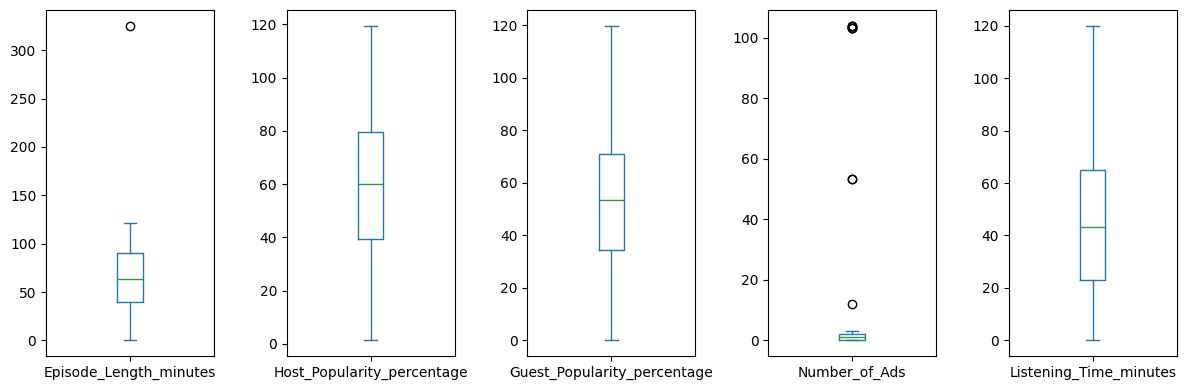

In [170]:
train.plot(kind='box', subplots=True, layout=(1,5), figsize=(12,4), sharey=False)

plt.tight_layout()
plt.show()

In [171]:
# Remove outliers

train=train[train['Episode_Length_minutes']<300]

In [172]:
train=train[train['Number_of_Ads']<12]

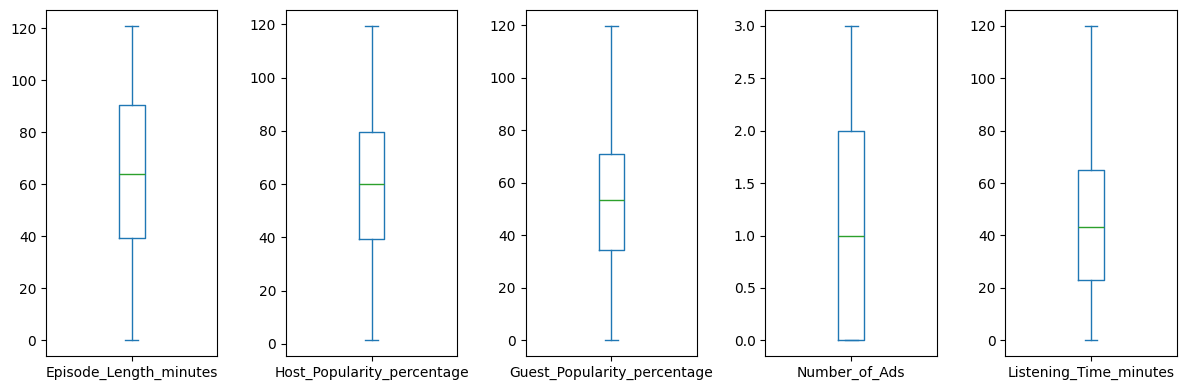

In [173]:
train.plot(kind='box', subplots=True, layout=(1,5), figsize=(12,4), sharey=False)

plt.tight_layout()
plt.show()

# Data Encoding 

## For Train

In [174]:
cat_cols = train.select_dtypes('object').columns
for i in cat_cols:
    print(f'The column {i} have {train[i].nunique()} Cardinality = {train[i].unique()}')
    print('_'*50)
    print()

The column Genre have 10 Cardinality = ['True Crime' 'Comedy' 'Education' 'Technology' 'Health' 'News' 'Music'
 'Sports' 'Business' 'Lifestyle']
__________________________________________________

The column Publication_Day have 7 Cardinality = ['Thursday' 'Saturday' 'Tuesday' 'Monday' 'Sunday' 'Wednesday' 'Friday']
__________________________________________________

The column Publication_Time have 4 Cardinality = ['Night' 'Afternoon' 'Evening' 'Morning']
__________________________________________________

The column Episode_Sentiment have 3 Cardinality = ['Positive' 'Negative' 'Neutral']
__________________________________________________



In [175]:
# Encoding Episode_Sentiment column with label encoding

label=LabelEncoder()

train['Episode_Sentiment']=label.fit_transform(train['Episode_Sentiment'])

# Save label Encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label, f)

In [176]:
# Encoding Genre, Publication_Day, Publication_Time with One Hot Encoding

from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder()

encoded_data=encoder.fit_transform(train[['Genre','Publication_Day','Publication_Time']]).toarray() 

# Save OneHot Encoding
with open('onehot_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [177]:
encoded_df=pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(),index=train.index)

encoded_df

,Genre_Business,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,Genre_Music,Genre_News,Genre_Sports,Genre_Technology,Genre_True Crime,...,Publication_Day_Monday,Publication_Day_Saturday,Publication_Day_Sunday,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Afternoon,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749994,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
749995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
749996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
749997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [178]:
train=pd.concat([train,encoded_df],axis=1)

In [179]:
train.drop(['Genre','Publication_Day','Publication_Time'],axis=1,inplace=True)

In [180]:
train.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Genre_Business,Genre_Comedy,Genre_Education,Genre_Health,...,Publication_Day_Monday,Publication_Day_Saturday,Publication_Day_Sunday,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Afternoon,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night
0,63.84,74.81,53.58,0.0,2,31.41998,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,119.80,66.95,75.95,2.0,0,88.01241,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,73.90,69.97,8.97,0.0,0,44.92531,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,67.17,57.22,78.70,2.0,2,46.27824,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,110.51,80.07,58.68,3.0,1,75.61031,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## For Test

In [181]:
cat_cols =test.select_dtypes('object').columns
for i in cat_cols:
    print(f'The column {i} have {test[i].nunique()} Cardinality = {test[i].unique()}')
    print('_'*50)
    print()

The column Genre have 10 Cardinality = ['Education' 'Music' 'Comedy' 'Lifestyle' 'Business' 'True Crime'
 'Technology' 'News' 'Sports' 'Health']
__________________________________________________

The column Publication_Day have 7 Cardinality = ['Saturday' 'Sunday' 'Friday' 'Wednesday' 'Tuesday' 'Thursday' 'Monday']
__________________________________________________

The column Publication_Time have 4 Cardinality = ['Evening' 'Morning' 'Night' 'Afternoon']
__________________________________________________

The column Episode_Sentiment have 3 Cardinality = ['Neutral' 'Positive' 'Negative']
__________________________________________________



In [182]:
# Encoding Episode_Sentiment column with label encoding

with open('label_encoder.pkl', 'rb') as f:
    label = pickle.load(f)

test['Episode_Sentiment'] = label.transform(test['Episode_Sentiment'])


In [183]:
# Encoding Genre, Publication_Day, Publication_Time with One Hot Encoding

with open('onehot_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)
    
encoded_data=encoder.transform(test[['Genre','Publication_Day','Publication_Time']]).toarray() 

In [184]:
encoded_df=pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(),index=test.index)

encoded_df

,Genre_Business,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,Genre_Music,Genre_News,Genre_Sports,Genre_Technology,Genre_True Crime,...,Publication_Day_Monday,Publication_Day_Saturday,Publication_Day_Sunday,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Afternoon,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
249996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
249997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
249998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [185]:
test=pd.concat([test,encoded_df],axis=1)

In [186]:
test.drop(['Genre','Publication_Day','Publication_Time'],axis=1,inplace=True)

In [187]:
test.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Genre_Business,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,...,Publication_Day_Monday,Publication_Day_Saturday,Publication_Day_Sunday,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Afternoon,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night
0,78.96,38.11,53.33,1.0,1,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,27.87,71.29,53.36,0.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,69.10,67.89,97.51,0.0,2,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,115.39,23.40,51.75,2.0,2,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,72.32,58.10,11.30,2.0,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Show Correlation

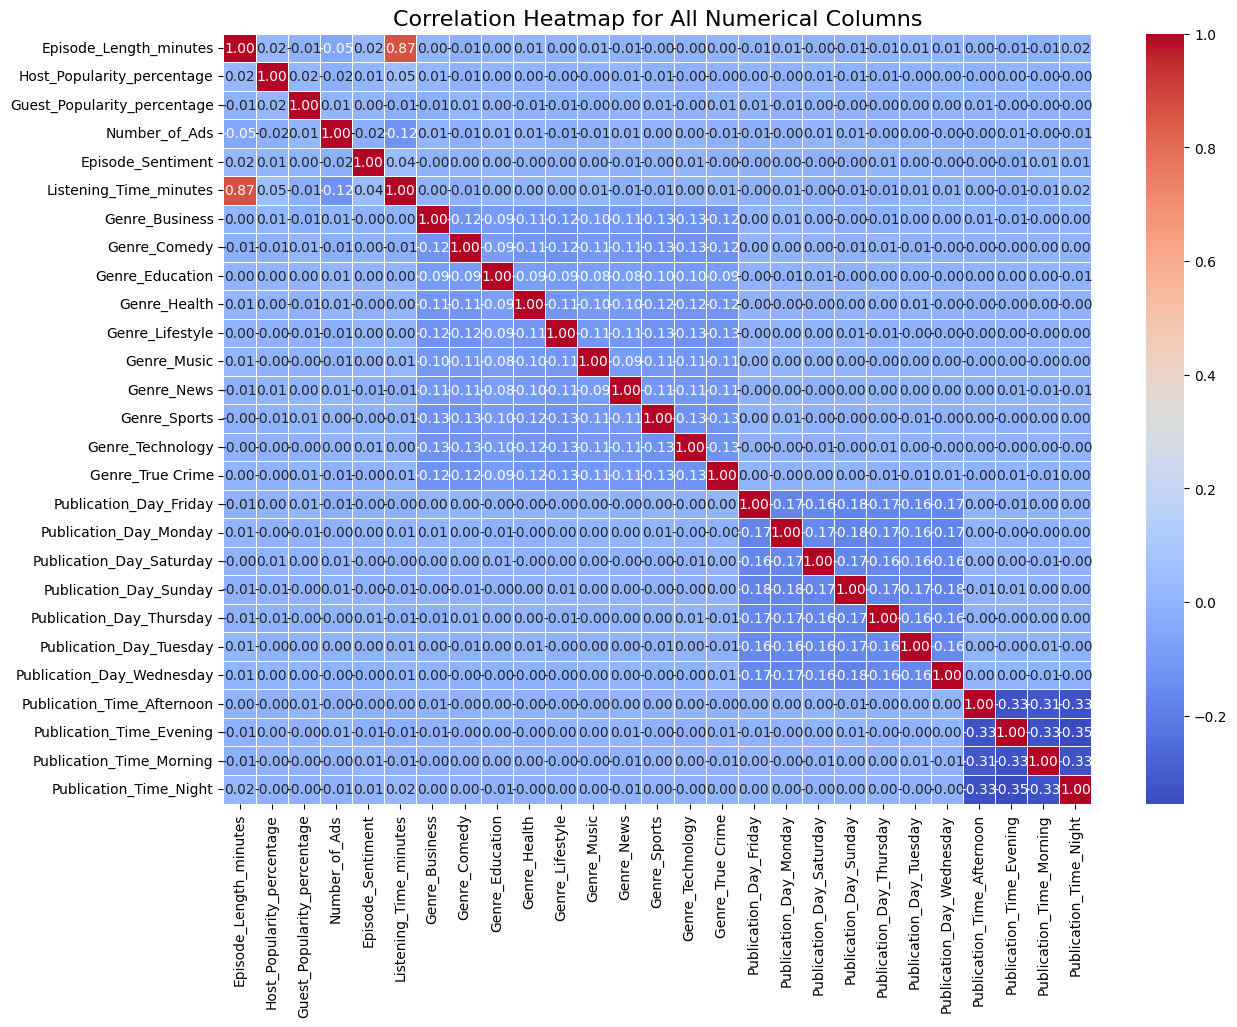

In [188]:
corr_matrix = train.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for All Numerical Columns", fontsize=16)
plt.show()

# Split data to X, y

In [189]:
X=train.drop(['Listening_Time_minutes'],axis=1)

y=train['Listening_Time_minutes']

# Make cross validation some models

In [190]:
models = {
    "LinearRegression": LinearRegression(),

    "DecisionTreeRegressor": DecisionTreeRegressor(max_depth=10, random_state=42),

    "RandomForestRegressor": RandomForestRegressor(n_estimators=100,max_depth=10, random_state=42),

    "XGBoosting": XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=10, random_state=42, verbosity=0),

}

In [191]:
# ---------------------------------------
# Setup K-Fold Cross Validation
# ---------------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

ModelName = []
TrainMetrics = []
TestMetrics = []

# ---------------------------------------
# Loop through each model
# ---------------------------------------
for name, model in tqdm(models.items()):
    train_fold_metrics = []
    test_fold_metrics = []

    for train_index, test_index in kf.split(X):
        # Split data
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Scale features
        scaler = RobustScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Train model
        model.fit(X_train, y_train)

        # ==========================
        # Train predictions + metrics
        # ==========================
        y_train_pred = model.predict(X_train)
        train_metrics_fold = [
            mean_absolute_error(y_train, y_train_pred),
            mean_squared_error(y_train, y_train_pred),
            np.sqrt(mean_squared_error(y_train, y_train_pred)),
            r2_score(y_train, y_train_pred)
        ]
        train_fold_metrics.append(train_metrics_fold)

        # ==========================
        # Test predictions + metrics
        # ==========================
        y_test_pred = model.predict(X_test)
        test_metrics_fold = [
            mean_absolute_error(y_test, y_test_pred),
            mean_squared_error(y_test, y_test_pred),
            np.sqrt(mean_squared_error(y_test, y_test_pred)),
            r2_score(y_test, y_test_pred)
        ]
        test_fold_metrics.append(test_metrics_fold)

    # Average metrics across folds
    avg_train_metrics = np.mean(train_fold_metrics, axis=0)
    avg_test_metrics = np.mean(test_fold_metrics, axis=0)

    ModelName.append(name)
    TrainMetrics.append(avg_train_metrics)
    TestMetrics.append(avg_test_metrics)

# ---------------------------------------
# Create DataFrames
# ---------------------------------------
ResultsTrain = pd.DataFrame(TrainMetrics, index=ModelName,columns=['Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2'])

ResultsTest = pd.DataFrame(TestMetrics, index=ModelName,columns=['Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2'])


100%|██████████| 4/4 [15:24<00:00, 231.22s/it]


In [192]:
print('avg metrics from cross validation for train')

ResultsTrain

avg metrics from cross validation for train


,Train_MAE,Train_MSE,Train_RMSE,Train_R2
LinearRegression,9.811317,178.414148,13.357170,0.757743
DecisionTreeRegressor,9.508823,171.252902,13.086358,0.767467
RandomForestRegressor,9.470670,169.565777,13.021737,0.769758
XGBoosting,8.898188,151.262276,12.298858,0.794611


In [193]:
print('avg metrics from cross validation for test')

ResultsTest

avg metrics from cross validation for test


,Test_MAE,Test_MSE,Test_RMSE,Test_R2
LinearRegression,9.811750,178.429735,13.357665,0.757723
DecisionTreeRegressor,9.600136,174.105426,13.194809,0.763595
RandomForestRegressor,9.556187,172.248078,13.124249,0.766116
XGBoosting,9.415477,168.463572,12.979249,0.771255


# Train data in XGBoosting(best model based on RMSE)

In [194]:
# Split data to train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [195]:
# Scaling data with Robust scaler

scaler=RobustScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [196]:
# Train model

best_model=XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=10, random_state=42, verbosity=0)

best_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


# Evaluate the model 

In [197]:
# Predict

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [198]:
# metrics function
def get_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

In [199]:
# train metrics
train_mae, train_mse, train_rmse, train_r2 = get_metrics(y_train, y_pred_train)

# test metrics
test_mae, test_mse, test_rmse, test_r2 = get_metrics(y_test, y_pred_test)

In [200]:
# put results in dataframe
metrics_df = pd.DataFrame({
    "MAE": [train_mae, test_mae],
    "MSE": [train_mse, test_mse],
    "RMSE": [train_rmse, test_rmse],
    "R2": [train_r2, test_r2]
}, index=["Train", "Test"])

In [201]:
metrics_df

,MAE,MSE,RMSE,R2
Train,8.912221,151.773784,12.319650,0.794098
Test,9.370724,166.408079,12.899926,0.773244


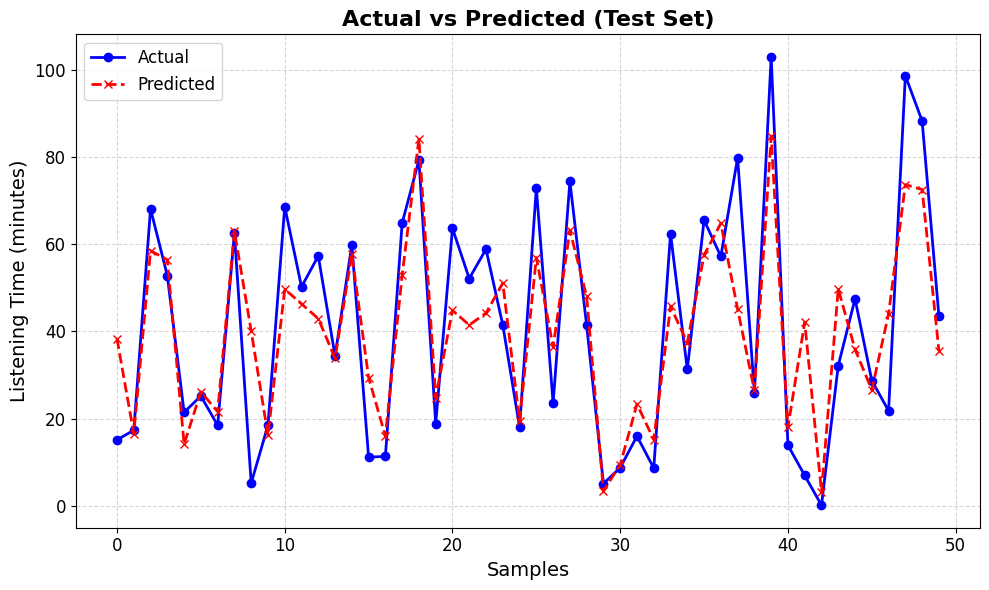

In [202]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.plot(range(len(y_test[:50])), y_test[:50], label='Actual', marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)
plt.plot(range(len(y_pred_test[:50])), y_pred_test[:50], label='Predicted', marker='x', color='red', linestyle='--', linewidth=2, markersize=6)

plt.title('Actual vs Predicted (Test Set)', fontsize=16, fontweight='bold')
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Listening Time (minutes)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


# Use test data to the model 

In [204]:
predictions=best_model.predict(test)

submission = pd.DataFrame({
    'Predicted': predictions
})
submission.to_csv("test_predictions.csv", index=False)

In [205]:
submission

,Predicted
0,76.621162
1,98.109985
2,93.939018
3,79.696350
4,82.431175
...,...
249995,71.244690
249996,72.212059
249997,83.601959
249998,81.415436
